In [30]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [31]:
df1 = pd.read_table('C:/Users/ROHITH KUMAR/Desktop/29-04-2023/normalizedCounts 1.txt')
df1

,Unnamed: 0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S50,S51,S52,S53,S54,S55,S56,S57,S58,S59
0,G1,0.000000,3.958608,3.335081,1.842095,2.025381,2.756255,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.546449,0.781852,0.000000,2.990959,4.611881,0.000000,1.649003,0.000000
1,G2,7.277933,7.913089,8.238561,8.424387,9.545450,7.990284,9.082155,9.329767,8.384522,...,9.416794,9.343192,9.008037,8.435803,7.841555,7.731928,8.789565,8.289456,8.898950,8.756475
2,G3,0.000000,1.622092,0.000000,1.197017,2.025381,0.000000,1.173272,2.890287,1.108965,...,1.514571,1.673958,1.956599,0.781852,0.802307,0.825562,1.014107,0.000000,2.889182,0.000000
3,G4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,G5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45970,G45971,0.000000,0.000000,0.000000,2.286276,0.000000,0.000000,1.811657,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.633946,0.000000,1.603742,0.000000,0.000000,0.000000
45971,G45972,9.722930,10.003650,9.524363,9.488686,10.362950,9.540568,9.967824,9.965025,9.743340,...,9.893189,9.617170,9.798326,9.461952,9.223031,9.392454,9.684468,9.351179,10.094930,9.455420
45972,G45973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.811657,0.000000,1.108965,...,0.000000,3.579475,2.275587,0.000000,1.314856,2.679328,0.000000,2.053210,0.000000,0.000000
45973,G45974,7.682646,7.163473,7.651159,8.130378,7.591986,7.909691,8.693380,6.203475,8.312850,...,7.700931,6.788482,7.913617,8.365172,8.927063,7.768153,8.367842,8.466919,8.166145,8.021732


In [32]:
df1.rename(columns = {'Unnamed: 0' : 'Gene'}, inplace = True)

In [33]:
df1.set_index('Gene', inplace = True)

In [34]:
df1.dropna(inplace = True) # droping the null values rows

In [35]:
df1 = df1.drop_duplicates() # dropping the duplicate records

### Model building

In [36]:
# defining the inputs to the model
inputs = df1

### Finding the optimal number of clusters using the elbow method

In [37]:
import matplotlib.pyplot as plt  

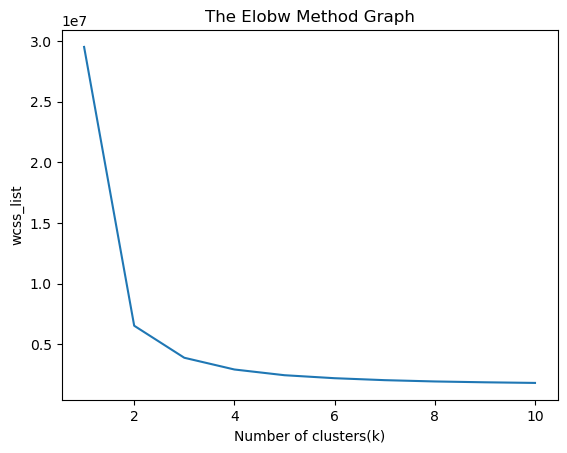

In [38]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(inputs)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [39]:
from sklearn.cluster import KMeans
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(inputs)

# predicting the groups
y_predict = kmeans.fit_predict(inputs)
y_predict

array([1, 2, 1, ..., 2, 1, 2])

In [40]:
# attaching the group labels into the dataframe
df1['y_predict'] = y_predict
df1

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S51,S52,S53,S54,S55,S56,S57,S58,S59,y_predict
Gene,,,,,,,,,,,,,,,,,,,,,
G1,0.000000,3.958608,3.335081,1.842095,2.025381,2.756255,0.000000,0.000000,0.000000,2.296334,...,0.000000,1.546449,0.781852,0.000000,2.990959,4.611881,0.000000,1.649003,0.000000,1
G2,7.277933,7.913089,8.238561,8.424387,9.545450,7.990284,9.082155,9.329767,8.384522,8.017907,...,9.343192,9.008037,8.435803,7.841555,7.731928,8.789565,8.289456,8.898950,8.756475,2
G3,0.000000,1.622092,0.000000,1.197017,2.025381,0.000000,1.173272,2.890287,1.108965,0.984057,...,1.673958,1.956599,0.781852,0.802307,0.825562,1.014107,0.000000,2.889182,0.000000,1
G4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
G5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G45970,2.146181,0.000000,2.333626,1.842095,3.117277,2.983255,2.589980,0.000000,0.000000,3.876986,...,2.695375,3.269688,3.943616,2.449780,2.990959,3.484979,3.490367,1.048295,3.069827,1
G45971,0.000000,0.000000,0.000000,2.286276,0.000000,0.000000,1.811657,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.633946,0.000000,1.603742,0.000000,0.000000,0.000000,1
G45972,9.722930,10.003650,9.524363,9.488686,10.362950,9.540568,9.967824,9.965025,9.743340,9.248759,...,9.617170,9.798326,9.461952,9.223031,9.392454,9.684468,9.351179,10.094930,9.455420,2


In [41]:
## defining inputs and outputs for the pca
inputs = df1.drop('y_predict', axis = 1)
outputs = df1['y_predict']

In [42]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
# defining no.of features we want from the dataset
pca = PCA(n_components = 15)
# passing inputs to the pca to obtain the low dimentional data
inputs_pca = pca.fit_transform(inputs)
# explained variance
explained_variance = pca.explained_variance_ratio_
# Print the explained variance ratio
print("Explained variance ratio:", explained_variance)
# Print the cumulative explained variance ratio
# this gives the features list with variances that represents the total data
# in this case the 15 features were explaining 97.24% of the data
print("Cumulative explained variance ratio:", np.cumsum(pca.explained_variance_ratio_))

# now we have obtained the low dimentional data, now we wish to create the new dataset with the features obtained
# after PCA
# we need to rename the columns for the dataframe after pca
col = []
for i in range(1,16):
    col.append(str('pca'+str(i)))
col
df_pca = pd.DataFrame(inputs_pca, columns = col)
# now adding the target column to the new df_pca dataframe
df_pca = pd.concat([df_pca, outputs.reset_index()], axis = 1)

Explained variance ratio: [0.94488996 0.00536928 0.00348061 0.00270824 0.00204584 0.0017795
 0.00173937 0.00168283 0.00151234 0.00133688 0.00129998 0.00127856
 0.00116516 0.00112204 0.00107208]
Cumulative explained variance ratio: [0.94488996 0.95025924 0.95373985 0.95644809 0.95849393 0.96027343
 0.9620128  0.96369564 0.96520798 0.96654486 0.96784484 0.9691234
 0.97028856 0.9714106  0.97248268]


## Note
1.  When we are trying to concat the dataframes the index must be same and the size should be same. 
    here i was trying to concat the df_pca with the outputs = df1['y_predict'] inwhich the indexes of df_pca and outputs were
    different and were giving the errors. 
    We can do this
    pd.concat([df_pca, outputs.reset_index()], axis = 1)
    After doing this we can set the gene column as the index(gene column was the index of outputs, but after resetting
    index the gene column has become one of the columns of outputs)
    
    We are using this method pd.concat([df_pca, outputs.reset_index()], axis = 1)

2.  We cannot concatenate the dataframe and the series. df_pca = pd.concat([df_pca, outputs], axis = 1) gives the error, here the outputs = df1['y_predict'] 

3. or we can convert the series to dataframe and then use concat function

In [43]:
# making the gene column as the index of the dataframe
df_pca = df_pca.set_index('Gene')

In [44]:
df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,y_predict
Gene,,,,,,,,,,,,,,,,
G1,-16.003058,-1.493179,-2.705717,-2.211635,3.549661,-0.157519,-1.240659,4.472577,2.850980,1.833298,-1.160706,-1.599435,2.384567,0.308740,-1.627971,1
G2,35.958178,0.538354,1.459621,-2.613676,-1.428884,-0.200071,0.984393,-1.287125,0.032005,-0.734028,-0.046466,-0.280966,0.096735,-0.902640,-0.081811,2
G3,-21.468536,1.280056,0.593207,-1.995594,-0.474335,-0.393521,-1.226771,-2.084050,-0.928881,-0.172042,-0.492401,0.032741,1.525234,-0.191637,0.545599,1
G4,-29.125082,1.407440,-0.814780,0.502475,-0.294355,0.065650,-0.593833,-0.765233,0.474594,0.143750,0.135457,-0.639410,-0.532658,-0.185921,-0.484289,1
G5,-29.891565,0.972361,-0.077913,-0.197030,0.068070,0.185962,-0.492125,-0.223462,0.111472,0.015013,-0.203792,-0.041592,0.061891,0.096098,0.070396,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G45970,-10.994875,-1.471361,4.860670,-0.546336,-0.275931,1.051612,-0.899105,-1.679079,-1.651005,2.081855,1.311583,0.899567,-0.697236,2.113881,1.021711,1
G45971,-27.750753,1.196536,0.498927,0.904902,0.268418,-1.588889,-0.922944,-0.426615,0.511485,-0.420042,0.807162,1.364482,-0.730669,-0.567751,-0.121501,1
G45972,43.690683,0.739376,-0.755054,-1.836135,-0.440347,-0.322105,0.152903,0.311575,-0.131404,-0.172860,-0.501268,-0.472771,0.134992,0.006684,0.311999,2


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

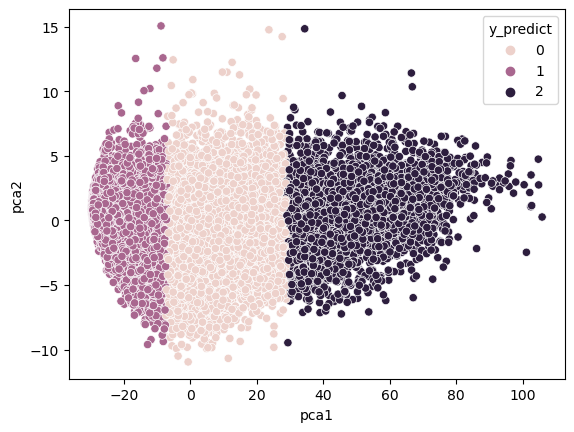

In [45]:
# Plot the transformed data
import seaborn as sns
sns.scatterplot(data=df_pca, x="pca1", y="pca2", hue="y_predict")

### Model building using the pca features

In [46]:
## defining inputs and outputs for the pca dataframe
inputs = df_pca.drop('y_predict', axis = 1)
outputs = df_pca['y_predict']

In [47]:
### splitting the data into test and train'
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, random_state = 42, train_size = 0.7)

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)
y_pred = clf_rf.predict(x_test)
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_pred, y_test)
print('The classification report for random forest classifier is\n ', clf_rpt)

The classification report for random forest classifier is
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1712
           1       1.00      1.00      1.00      4759
           2       1.00      1.00      1.00      2011

    accuracy                           1.00      8482
   macro avg       1.00      1.00      1.00      8482
weighted avg       1.00      1.00      1.00      8482

